In [2]:
import config as conf
config = conf.Config.from_toml("config.toml")
print(config)

Config(stockfish=WindowsPath('C:/Users/jmel/Desktop/Pulp/helper/chess-cheater/stockfish/stockfish-windows-x86-64-avx2.exe'), lichess_db=LichessDB(catalog=WindowsPath('lichess_db'), zst_compressed_db=WindowsPath('lichess_db_standard_rated_2014-04.pgn.zst'), lichess_db_file=WindowsPath('lichess_db_201403.pgn')))


In [30]:
with open(r'cheater_PGNs\white_cheater_PGN2.txt') as f:
    pgn = f.read()

moves = []
for element in pgn.split():
    if element[-1] != '.' and element != '0-1' and element != '1-0' and element != '1/2-1/2':
        moves.append(element)

In [31]:
from stockfish import Stockfish
print(config.stockfish)
stockfish = Stockfish(path=config.stockfish)

# stockfish.update_engine_parameters({"Threads": 12})
# stockfish.set_depth(16)

C:\Users\jmel\Desktop\Pulp\helper\chess-cheater\stockfish\stockfish-windows-x86-64-avx2.exe


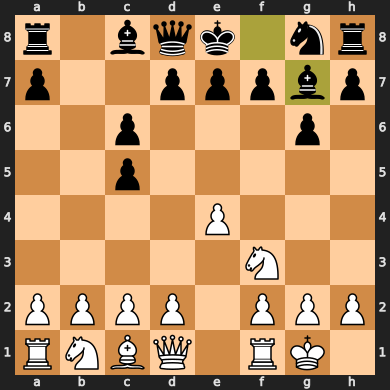

In [32]:
import chess

board = chess.Board()

for _ in range(10):
    if board.is_checkmate():
        break
    stockfish.set_fen_position(board.fen())

    board.push_uci(stockfish.get_best_move())
board

In [33]:
board.fen()

'r1bqk1nr/p2pppbp/2p3p1/2p5/4P3/5N2/PPPP1PPP/RNBQ1RK1 w kq - 2 6'

61
65
156


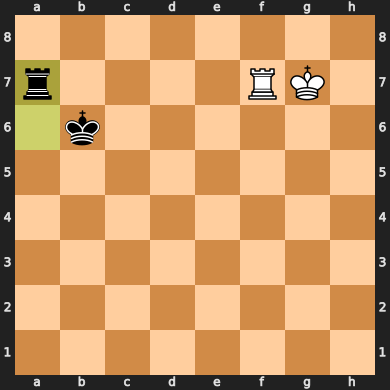

In [34]:
import chess

board = chess.Board()

hits_white = 0
hits_black = 0
eval_list = []

for idx, move in enumerate(moves):
    stockfish.set_fen_position(board.fen())
    eval = stockfish.get_evaluation()
    if eval['type'] == 'cp':
        eval_list.append(eval['value'])
    best_moves_dict = stockfish.get_top_moves(3)
    best_moves = [move['Move'] for move in best_moves_dict]
    if board.parse_san(move).uci() in best_moves and idx % 2 == 0:
        hits_white += 1
    elif board.parse_san(move).uci() in best_moves and idx % 2 == 1:
        hits_black += 1
    board.push_san(move)
print(hits_white)
print(hits_black)
print(len(moves))
board

[33, 19, 22, 28, 27, 24, 15, 20, 28, -18, -4, -10, -14, -10, -32, -26, 50, 55, 106, 108, 137, 105, 100, 84, 117, 121, 130, 112, 112, 100, 139, 143, 177, 156, 210, 200, 235, 109, 83, 128, 109, 69, 84, 90, 71, 57, 64, 80, 91, 85, 86, 51, 61, 65, 64, 72, 57, 52, 62, 59, 60, 52, 42, 55, 49, 53, 48, 33, 35, 31, 27, 22, 17, 26, 30, 23, 21, 32, 21, 13, 17, 28, 31, 22, 23, 31, 38, 89, 46, 6, 136, 108, 57, 27, 30, 28, 382, 409, 395, 374, 450, 456, 451, 420, 420, 243, 226, 169, 298, 17, 10, 11, 10, 0, 0, 0, 0, 0, 0, 0, 2, 4, 0, 2, 2, 2, 1, 2, 278, 281, 418, 1, 3, 0, 1, 0, 0, 0, 7, 1, 0, 0, 4, 5, 9, 4, 3, 4, 5, 0, 0, 0, 0, 0, 0, 0]
75.22435897435898


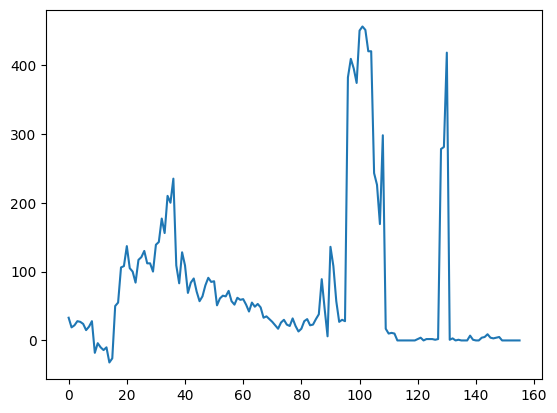

In [36]:
import numpy as np
from matplotlib import pyplot as plt
print(eval_list)
print(np.mean(eval_list))
plt.plot(eval_list)

In [37]:
board = chess.Board()
print(board.fen())
board.push_san('e4')
print(board.fen())
board.push_san('d5')
print(board.fen())
board.push_san('exd5')
print(board.fen())
board.push_san('Nc6')
print(board.fen().split()[0])
print(board)

rnbqkbnr/pppppppp/8/8/8/8/PPPPPPPP/RNBQKBNR w KQkq - 0 1
rnbqkbnr/pppppppp/8/8/4P3/8/PPPP1PPP/RNBQKBNR b KQkq - 0 1
rnbqkbnr/ppp1pppp/8/3p4/4P3/8/PPPP1PPP/RNBQKBNR w KQkq - 0 2
rnbqkbnr/ppp1pppp/8/3P4/8/8/PPPP1PPP/RNBQKBNR b KQkq - 0 2
r1bqkbnr/ppp1pppp/2n5/3P4/8/8/PPPP1PPP/RNBQKBNR
r . b q k b n r
p p p . p p p p
. . n . . . . .
. . . P . . . .
. . . . . . . .
. . . . . . . .
P P P P . P P P
R N B Q K B N R


In [39]:
piece_to_onehot = {'r' :        [1,0,0,0,0,0,0,0,0,0,0,0],
                   'n' :        [0,1,0,0,0,0,0,0,0,0,0,0],
                   'b' :        [0,0,1,0,0,0,0,0,0,0,0,0],
                   'q' :        [0,0,0,1,0,0,0,0,0,0,0,0],
                   'k' :        [0,0,0,0,1,0,0,0,0,0,0,0],
                   'p' :        [0,0,0,0,0,1,0,0,0,0,0,0],
                   'R' :        [0,0,0,0,0,0,1,0,0,0,0,0],
                   'N' :        [0,0,0,0,0,0,0,1,0,0,0,0],
                   'B' :        [0,0,0,0,0,0,0,0,1,0,0,0],
                   'Q' :        [0,0,0,0,0,0,0,0,0,1,0,0],
                   'K' :        [0,0,0,0,0,0,0,0,0,0,1,0],
                   'P' :        [0,0,0,0,0,0,0,0,0,0,0,1],
                   'empty' :    [0,0,0,0,0,0,0,0,0,0,0,0]}
piece_to_token   = {'r' :        1,
                   'n' :        2,
                   'b' :        3,
                   'q' :        4,
                   'k' :        5,
                   'p' :        6,
                   'R' :        7,
                   'N' :        8,
                   'B' :        9,
                   'Q' :        10,
                   'K' :        11,
                   'P' :        12,
                   'empty' :    0}

def fen_to_network_input_one_hot(fen):
    encoded_board = []
    fen = fen.split()[0]
    for char in fen:
        if char in piece_to_onehot.keys():
            encoded_board.append(piece_to_onehot[char])
        elif char != '/':
            for _ in range(int(char)):
                encoded_board.append(piece_to_onehot['empty'])
    return encoded_board


def fen_to_network_input_tokenized(fen):
    encoded_board = []
    fen = fen.split()[0]
    for char in fen:
        if char in piece_to_token.keys():
            encoded_board.append(piece_to_token[char])
        elif char != '/':
            for _ in range(int(char)):
                encoded_board.append(piece_to_token['empty'])
    return encoded_board

In [40]:
tokenized_board = fen_to_network_input_tokenized(board.fen())
encoded_board = fen_to_network_input_one_hot(board.fen())
print(tokenized_board)
print(encoded_board)

[1, 0, 3, 4, 5, 3, 2, 1, 6, 6, 6, 0, 6, 6, 6, 6, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 12, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 12, 12, 12, 12, 0, 12, 12, 12, 7, 8, 9, 10, 11, 9, 8, 7]
[[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0], [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [41]:
type(encoded_board[0])

list

In [42]:
from torch import nn
import torch

embedding = nn.Embedding(13,3)

tokenized_board = torch.IntTensor(tokenized_board)

embedded_board = embedding(tokenized_board)
embedded_board #.reshape(1,192)

tensor([[ 0.3254,  0.3398, -0.7385],
        [ 0.7598, -0.8006,  0.4808],
        [-0.1494, -1.3886,  0.6729],
        [ 1.6339,  0.5639, -0.4404],
        [ 1.8956, -0.4084, -1.3123],
        [-0.1494, -1.3886,  0.6729],
        [ 0.3338,  0.1381, -0.6110],
        [ 0.3254,  0.3398, -0.7385],
        [-1.3492, -0.8477, -0.1972],
        [-1.3492, -0.8477, -0.1972],
        [-1.3492, -0.8477, -0.1972],
        [ 0.7598, -0.8006,  0.4808],
        [-1.3492, -0.8477, -0.1972],
        [-1.3492, -0.8477, -0.1972],
        [-1.3492, -0.8477, -0.1972],
        [-1.3492, -0.8477, -0.1972],
        [ 0.7598, -0.8006,  0.4808],
        [ 0.7598, -0.8006,  0.4808],
        [ 0.3338,  0.1381, -0.6110],
        [ 0.7598, -0.8006,  0.4808],
        [ 0.7598, -0.8006,  0.4808],
        [ 0.7598, -0.8006,  0.4808],
        [ 0.7598, -0.8006,  0.4808],
        [ 0.7598, -0.8006,  0.4808],
        [ 0.7598, -0.8006,  0.4808],
        [ 0.7598, -0.8006,  0.4808],
        [ 0.7598, -0.8006,  0.4808],
 

In [43]:
# an Embedding module containing 10 tensors of size 3
embedding = nn.Embedding(10, 3)
# a batch of 2 samples of 4 indices each
input = torch.LongTensor([[1, 2, 4, 5], [4, 3, 2, 9]])
embedding(input)

tensor([[[-0.0618,  1.0497, -0.6822],
         [-0.3704,  0.2935,  0.0871],
         [ 0.0349,  0.1232, -1.7781],
         [ 0.5199,  0.8305, -0.3946]],

        [[ 0.0349,  0.1232, -1.7781],
         [-0.8045, -0.6222,  1.2299],
         [-0.3704,  0.2935,  0.0871],
         [-0.0756,  0.2321,  0.9218]]], grad_fn=<EmbeddingBackward0>)

In [48]:
import zstandard


with open(config.lichess_db.catalog / config.lichess_db.zst_compressed_db, 'rb') as compressed:
        decomp = zstandard.ZstdDecompressor()
        with open(config.lichess_db.catalog / config.lichess_db.lichess_db_file, 'wb') as destination:
            decomp.copy_stream(compressed, destination)

In [49]:
import re
with open(config.lichess_db.catalog / config.lichess_db.lichess_db_file, 'r') as f:
    games = []
    game = []
    for i in range(14_000_000):
        line = f.readline()
        if re.match('\[Site', line) is not None:
            site = line
            # continue
        # else:
        #     site = None
        elif re.match('\[Result', line) is not None:
            result = line
            # continue
        # else:
        #     result = None
        elif re.match('\[WhiteElo', line) is not None:
            white_elo = line
            # continue
        # else:
        #     white_elo = None
        elif re.match('\[BlackElo', line) is not None:
            black_elo = line
        #     continue
        # else:
        #     black_elo = None
        elif re.match('1\.', line) is not None:
            moves = line
            game = [site, result, white_elo, black_elo, moves]
            games.append(game)

len(games)

778648

In [51]:
c = 0
for game in games:
    if len(game)>5:
        # print(game)
        c += 1
print(c)

0


In [52]:
import pandas as pd

df = pd.DataFrame(games, columns=['Site', 'Result', 'WhiteElo', 'BlackElo', 'Moves'])

In [53]:
df.to_csv(config.lichess_db.catalog / 'lichess_db_pgn_to_csv.csv')